#### Final Project - Tesla Stock Closing Price Prediction
#### Introduction to Data Analytics
#### Humber College - Winter 2022
#### Name: Nguyen Anh Tuan Le
#### Student ID: N014141295

Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

Read the data csv file

In [2]:
data = pd.read_csv('Tesla_Nasdaq_Prediction.csv')

Dataset discussion (perform visualization, univariate, bivariate, and
multivariate analysis on the selected dataset)

In [3]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,4/8/2022,1025.49,18337900,1043.21,1048.44,1022.44
1,4/7/2022,1057.26,26482350,1052.39,1076.59,1021.54
2,4/6/2022,1045.76,29782850,1073.47,1079.00,1027.70
3,4/5/2022,1091.26,26691670,1136.30,1152.87,1087.30
4,4/4/2022,1145.45,27392570,1089.38,1149.91,1072.53


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
time_index = data.reset_index()[['Date']]
# data = data.reset_index()
# data = data.set_index('Date')
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,2022-04-08,1025.49,18337900,1043.21,1048.44,1022.44
1,2022-04-07,1057.26,26482350,1052.39,1076.59,1021.54
2,2022-04-06,1045.76,29782850,1073.47,1079.00,1027.70
3,2022-04-05,1091.26,26691670,1136.30,1152.87,1087.30
4,2022-04-04,1145.45,27392570,1089.38,1149.91,1072.53


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
 2   Volume      2517 non-null   int64         
 3   Open        2517 non-null   float64       
 4   High        2517 non-null   float64       
 5   Low         2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


In [6]:
data.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [7]:
data.describe()

,Close/Last,Volume,Open,High,Low
count,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000
mean,166.709845,3.561019e+07,166.634692,170.455399,162.719750
std,270.828607,2.793934e+07,270.776286,277.324411,264.008236
min,5.220000,1.878980e+06,5.370000,5.370000,5.100000
25%,40.620000,1.878610e+07,40.500000,41.240000,39.910000
50%,50.970000,2.830952e+07,51.010000,51.760000,50.130000
75%,71.700000,4.289398e+07,72.000000,73.200000,70.580000
max,1229.910000,3.046938e+08,1234.410000,1243.490000,1217.000000


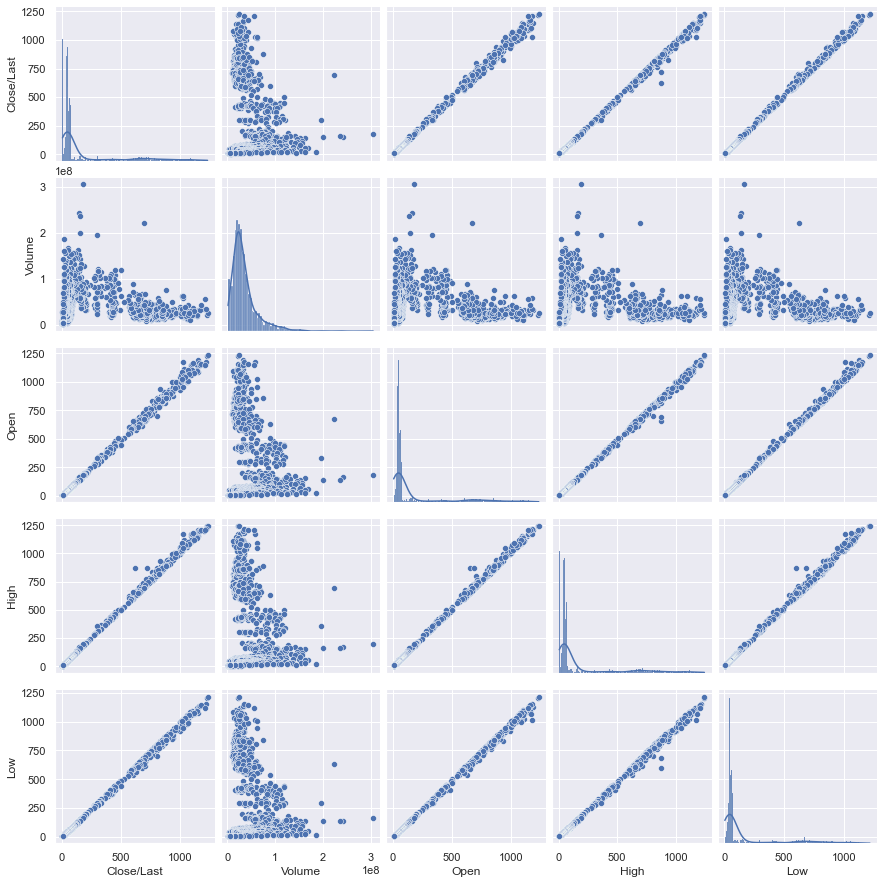

In [8]:
sns.set()
sns.pairplot(data).map_diag(sns.histplot, kde=True)

<AxesSubplot:xlabel='Close/Last', ylabel='Count'>

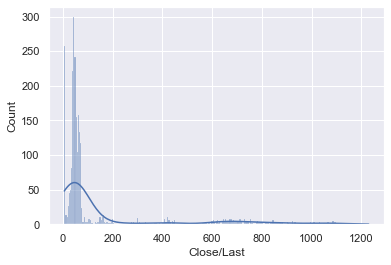

In [9]:
sns.histplot(data['Close/Last'], kde=True)

<AxesSubplot:xlabel='Volume', ylabel='Count'>

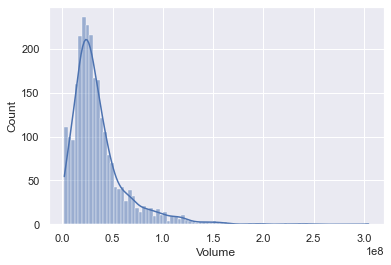

In [10]:
sns.histplot(data['Volume'], kde=True)

<AxesSubplot:xlabel='Open', ylabel='Count'>

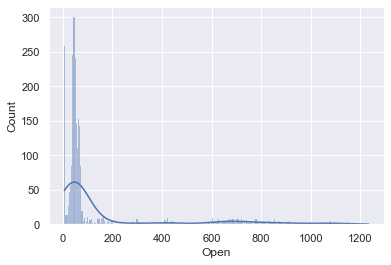

In [11]:
sns.histplot(data['Open'], kde=True)

<AxesSubplot:xlabel='High', ylabel='Count'>

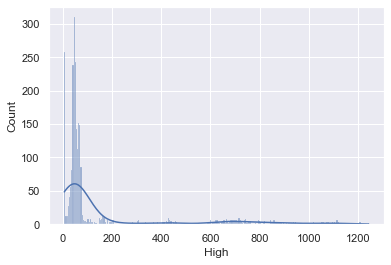

In [12]:
sns.histplot(data['High'], kde=True)

<AxesSubplot:xlabel='Low', ylabel='Count'>

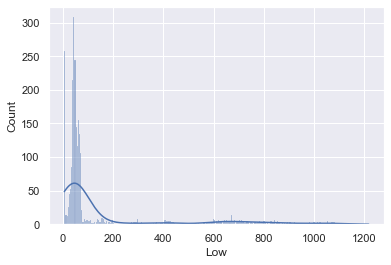

In [13]:
sns.histplot(data['Low'], kde=True)

- Univariate Data Analysis
    - Close/Last, Open, High, Low: have positively skewed distributions. The majority of them accumulate under US$200.
    - Volume: has a positively skewed distribution with most of them gathering around 0 to 1e8

<AxesSubplot:>

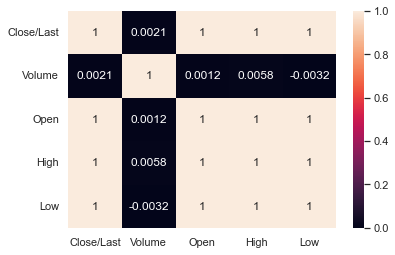

In [14]:
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='Open', ylabel='Close/Last'>

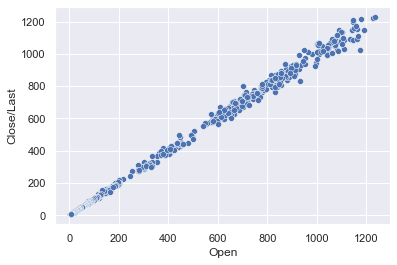

In [15]:
sns.scatterplot(x=data['Open'], y=data['Close/Last'])

<AxesSubplot:xlabel='High', ylabel='Close/Last'>

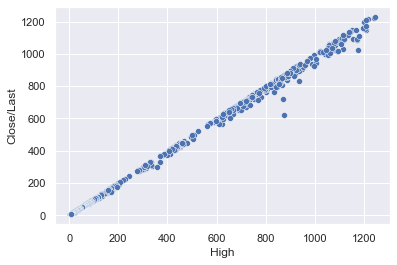

In [16]:
sns.scatterplot(x=data['High'], y=data['Close/Last'])

<AxesSubplot:xlabel='Low', ylabel='Close/Last'>

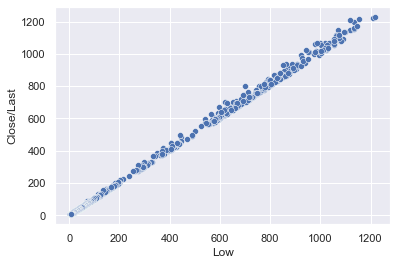

In [17]:
sns.scatterplot(x=data['Low'], y=data['Close/Last'])

<AxesSubplot:xlabel='Volume', ylabel='Close/Last'>

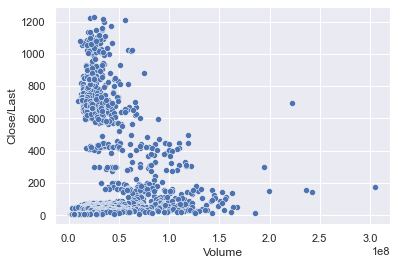

In [18]:
sns.scatterplot(x=data['Volume'], y=data['Close/Last'])

- Bivariate Data Analysis: according to the heatmap, Open, High and Low have extremely strong correlations with Close/Last, while Volume has a very weak relationship with Close/Last
    - Open vs Close/Last:
        - Direction: positive
        - Form: linear
        - Strength: strong
        - Outliers: no
    - High vs Close/Last:
        - Direction: positive
        - Form: linear
        - Strength: strong
        - Outliers: no/rare
    - Low vs Close/Last:
        - Direction: positive
        - Form: linear
        - Strength: strong
        - Outliers: no
    - Low vs Close/Last:
        - Direction: low to no correlation
        - Form: non-linear
        - Strength: moderate
        - Outliers: yes

Try to standardize or normalize the data before split

In [19]:
# data['Volume'] = data['Volume']/np.max(data['Volume'])

# data = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns)
# data = pd.DataFrame(MinMaxScaler().fit_transform(data), columns=data.columns)
data.head(10)

,Date,Close/Last,Volume,Open,High,Low
0,2022-04-08,1025.49,18337900,1043.21,1048.44,1022.44
1,2022-04-07,1057.26,26482350,1052.39,1076.59,1021.54
2,2022-04-06,1045.76,29782850,1073.47,1079.00,1027.70
3,2022-04-05,1091.26,26691670,1136.30,1152.87,1087.30
4,2022-04-04,1145.45,27392570,1089.38,1149.91,1072.53
5,2022-04-01,1084.59,18087740,1081.15,1094.75,1066.64
6,2022-03-31,1077.60,16330920,1094.57,1103.14,1076.64
7,2022-03-30,1093.99,19955000,1091.17,1113.95,1084.00
8,2022-03-29,1099.57,24538270,1107.99,1114.77,1073.11
9,2022-03-28,1091.84,34168690,1065.10,1097.88,1053.60


For this dataset, the target column will be Close/Last

In [20]:
# X = data[['Open', 'High', 'Low']]
X = data[['Volume', 'Open', 'High', 'Low']]
y = data['Close/Last']

Split the data to training and testing datasets with (20% test)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2013, 4) (2013,) (504, 4) (504,)


Try to standardize or normalize the data after split

In [22]:
# X_train = pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X_train.columns)
# X_test = pd.DataFrame(StandardScaler().fit_transform(X_test), columns=X_test.columns)

# X_train = pd.DataFrame(MinMaxScaler().fit_transform(X_train), columns=X_train.columns)
# X_test = pd.DataFrame(MinMaxScaler().fit_transform(X_test), columns=X_test.columns)
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

        Volume     Open     High      Low
111   29918420  1081.86  1115.21  1073.21
1975  15362100    41.95    42.16    41.44
767   36709340    52.89    54.05    52.89
1899  18725025    50.22    50.57    49.41
1515  49657350    48.10    51.31    48.00
111     1114.00
1975      41.63
767       53.55
1899      50.43
1515      51.09
Name: Close/Last, dtype: float64
        Volume    Open    High     Low
1800  19822775   41.14   41.14   40.30
170   15623050  711.90  716.33  697.63
1494  42750020   46.06   46.89   44.08
1253  19455725   60.49   61.32   60.42
628   42440795   49.43   50.22   49.36
1800     40.87
170     699.10
1494     44.51
1253     61.10
628      49.58
Name: Close/Last, dtype: float64


For this dataset and the closing price column is being predicted, regression models will be used

Find best M for Polynomial model

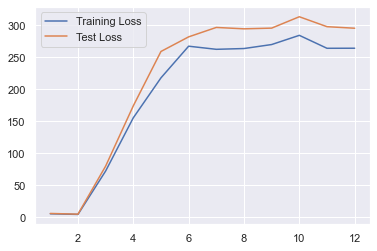

In [23]:
collect_training_loss = []
collect_test_loss = []
collect_m = []
for m in range(1, 13):
    poly_model = make_pipeline(PolynomialFeatures(degree=m),LinearRegression())
    poly_model.fit(X_train, y_train)
    yfit = poly_model.predict(X_test)
    yfit_training = poly_model.predict(X_train)
    collect_test_loss.append(np.sqrt(metrics.mean_squared_error(y_test, yfit)))
    collect_training_loss.append(np.sqrt(metrics.mean_squared_error(y_train, yfit_training)))
    collect_m.append(m)

sns.lineplot(x=collect_m,y=collect_training_loss)
sns.lineplot(x=collect_m,y=collect_test_loss)
plt.legend(labels=['Training Loss', 'Test Loss'])

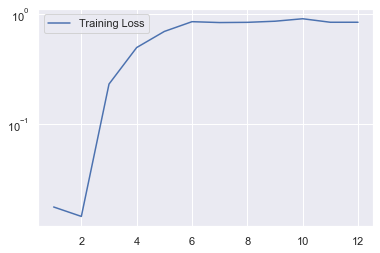

In [24]:
maxi = np.max([np.max(collect_training_loss),np.max(collect_test_loss)])
g_results = sns.lineplot(x=collect_m, y=collect_training_loss/maxi)
g_results.set(yscale='log')
plt.legend(labels=['Training Loss'])

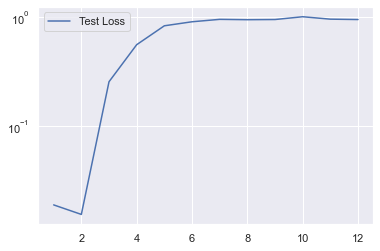

In [25]:
g_results = sns.lineplot(x=collect_m, y=collect_test_loss/maxi)
g_results.set(yscale='log')
plt.legend(labels=['Test Loss'])

The optimal M is 2 (default of PolynomialFeatures)

Fit models and evaluation

Polynomial Regression model with M = 2 (default)

In [26]:
pm = make_pipeline(PolynomialFeatures(), LinearRegression())
pm.fit(X_train, y_train)
pm_pred = pm.predict(X_test)
pm_pred = pd.DataFrame({'y_pred':pm_pred}, index=X_test.index)
pm_pred = pm_pred.join(y_test.rename('y_test'))
pm_pred = pm_pred.join(X_test.mean(axis=1).rename('X_test_mean'))
pm_pred = pm_pred.join(time_index)
pm_pred.set_index('Date', inplace=True)
print(pm_pred.head())
pm.score(X_test, pm_pred['y_pred'])

                y_pred  y_test   X_test_mean
Date                                        
2015-02-17   40.797976   40.87  4.955724e+06
2021-08-06  704.576995  699.10  3.906294e+06
2016-05-04   45.717143   44.51  1.068754e+07
2017-04-19   60.785121   61.10  4.863977e+06
2019-10-11   49.824801   49.58  1.061024e+07


1.0

Linear Regression model

In [27]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_pred = lm.predict(X_test)
lm_pred = pd.DataFrame({'y_pred':lm_pred}, index=X_test.index)
lm_pred = lm_pred.join(y_test.rename('y_test'))
lm_pred = lm_pred.join(X_test.mean(axis=1).rename('X_test_mean'))
lm_pred = lm_pred.join(time_index)
lm_pred.set_index('Date', inplace=True)
print(lm_pred.head())
lm.score(X_test, lm_pred['y_test'])

                y_pred  y_test   X_test_mean
Date                                        
2015-02-17   40.398100   40.87  4.955724e+06
2021-08-06  708.842815  699.10  3.906294e+06
2016-05-04   45.202856   44.51  1.068754e+07
2017-04-19   61.153265   61.10  4.863977e+06
2019-10-11   50.510657   49.58  1.061024e+07


0.99957840810524

In [28]:
print('MAE PM:', metrics.mean_absolute_error(pm_pred['y_test'], pm_pred['y_pred']))
print('MAE LM:', metrics.mean_absolute_error(lm_pred['y_test'], lm_pred['y_pred']))
print('MSE PM:', metrics.mean_squared_error(pm_pred['y_test'], pm_pred['y_pred']))
print('MSE LM:', metrics.mean_squared_error(lm_pred['y_test'], lm_pred['y_pred']))
print('RMSE PM:', np.sqrt(metrics.mean_squared_error(pm_pred['y_test'], pm_pred['y_pred'])))
print('RMSE LM:', np.sqrt(metrics.mean_squared_error(lm_pred['y_test'], lm_pred['y_pred'])))

MAE PM: 2.03421400299263
MAE LM: 2.491998117042151
MSE PM: 24.2443043657988
MSE LM: 36.1754499571772
RMSE PM: 4.923850562902859
RMSE LM: 6.0146030589871184


In [29]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('TESLA/USD', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)

Polynomial Regression plot

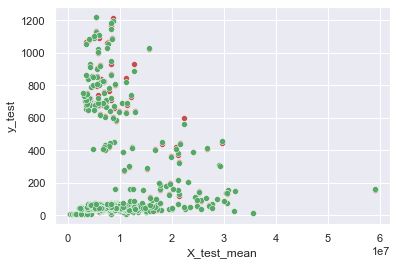

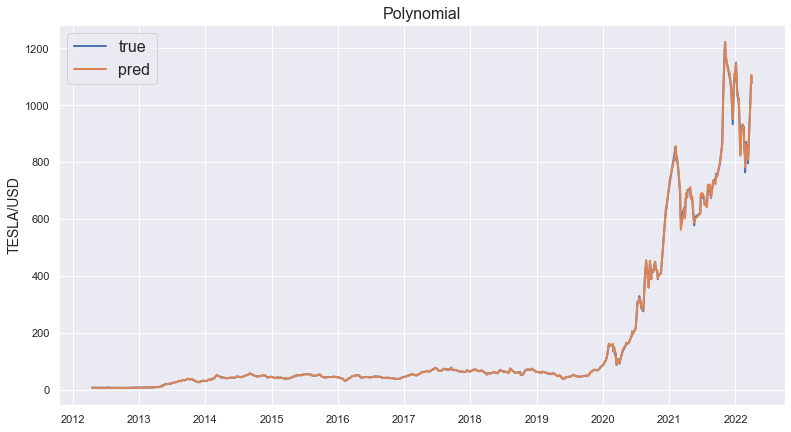

In [30]:
pm_pred.sort_index(inplace=True)
sns.scatterplot(x=pm_pred['X_test_mean'], y=pm_pred['y_test'], color='r')
sns.scatterplot(x=pm_pred['X_test_mean'], y=pm_pred['y_pred'], color='g')
line_plot(pm_pred['y_test'], pm_pred['y_pred'], 'true', 'pred', title='Polynomial')

Linear Regression plot

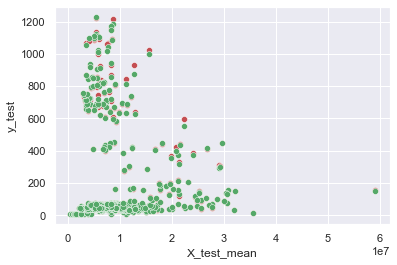

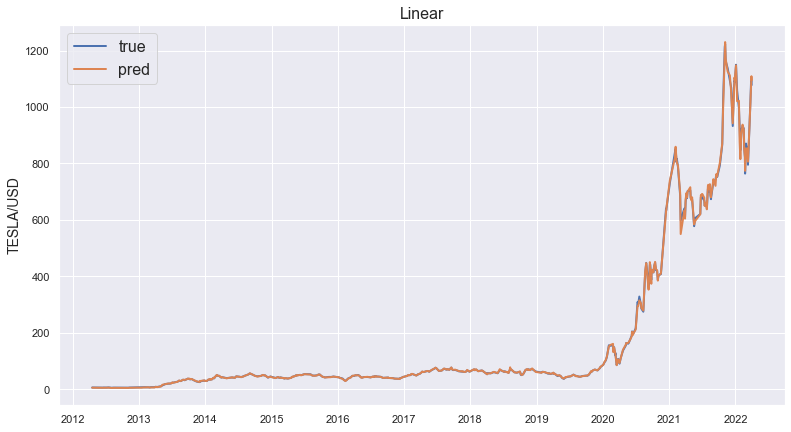

In [31]:
lm_pred.sort_index(inplace=True)
sns.scatterplot(x=lm_pred['X_test_mean'], y=lm_pred['y_test'], color='r')
sns.scatterplot(x=lm_pred['X_test_mean'], y=lm_pred['y_pred'], color='g')
line_plot(lm_pred['y_test'], lm_pred['y_pred'], 'true', 'pred', title='Linear')

With slightly lower values of MAE, MSE and RMSE, the Polynomial Regression model is better for this dataset and with the current best M = 2, the model is basically similar to a Linear Regression model. Based on my observation, their performances vary, and the models' accuracies can be interchangeable from time to time. As a result, the Linear Regression model predicts better than the Polynomial Regression model sometimes. With a bigger dataset that includes day-to-day records, the performance difference between the two models can be clearer and more drastic.